# Using the Bloomberg Terminal to Explore Stock Market Trends: An Analysis of Historical EPS Forecast Accuracy for All Firms in the 2019 S&P 500 Index

### by Marc Angelo Acebedo

## Investigation Overview

> Through using Bloomberg Excel functions, I gathered the following 4 stock price data for all firms in the 2019 S&P Index from 1999 - 2019:

- Actual EPS
- Forecasted EPS
- EOD Price
- Forecasted EPS (made 3 months prior)

For a general picture, I wanted to see how accurate **forecasted EPS** values were to their corresponding **actual EPS** values.

## Dataset Overview

The main dataset in question, **features.csv**, consists of 167,660 entries with 5 columns. 

The other dataset in question, **avgs.csv**, contains 52,015 with 5 columns. The quantitative values in this dataset consist of yearly, quarterly, and twenty-year *averages* extracted from the previous *features.csv* dataset.

Lastly, **firms.csv** assigns each firm abbreviation with firm ID as the primary key. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#display png files
from IPython.display import Image

import warnings
warnings.simplefilter('ignore')

In [3]:
#define visualization paths
PATH_UNIVARIATE = './visuals/univariate/'
PATH_BIVARIATE = './visuals/bivariate/'
PATH_MULTIVARIATE = './visuals/multivariate/'

## Question 1
> Does average EPS prediction error depict any differences in trends among a yearly, quarterly, and full-term basis?

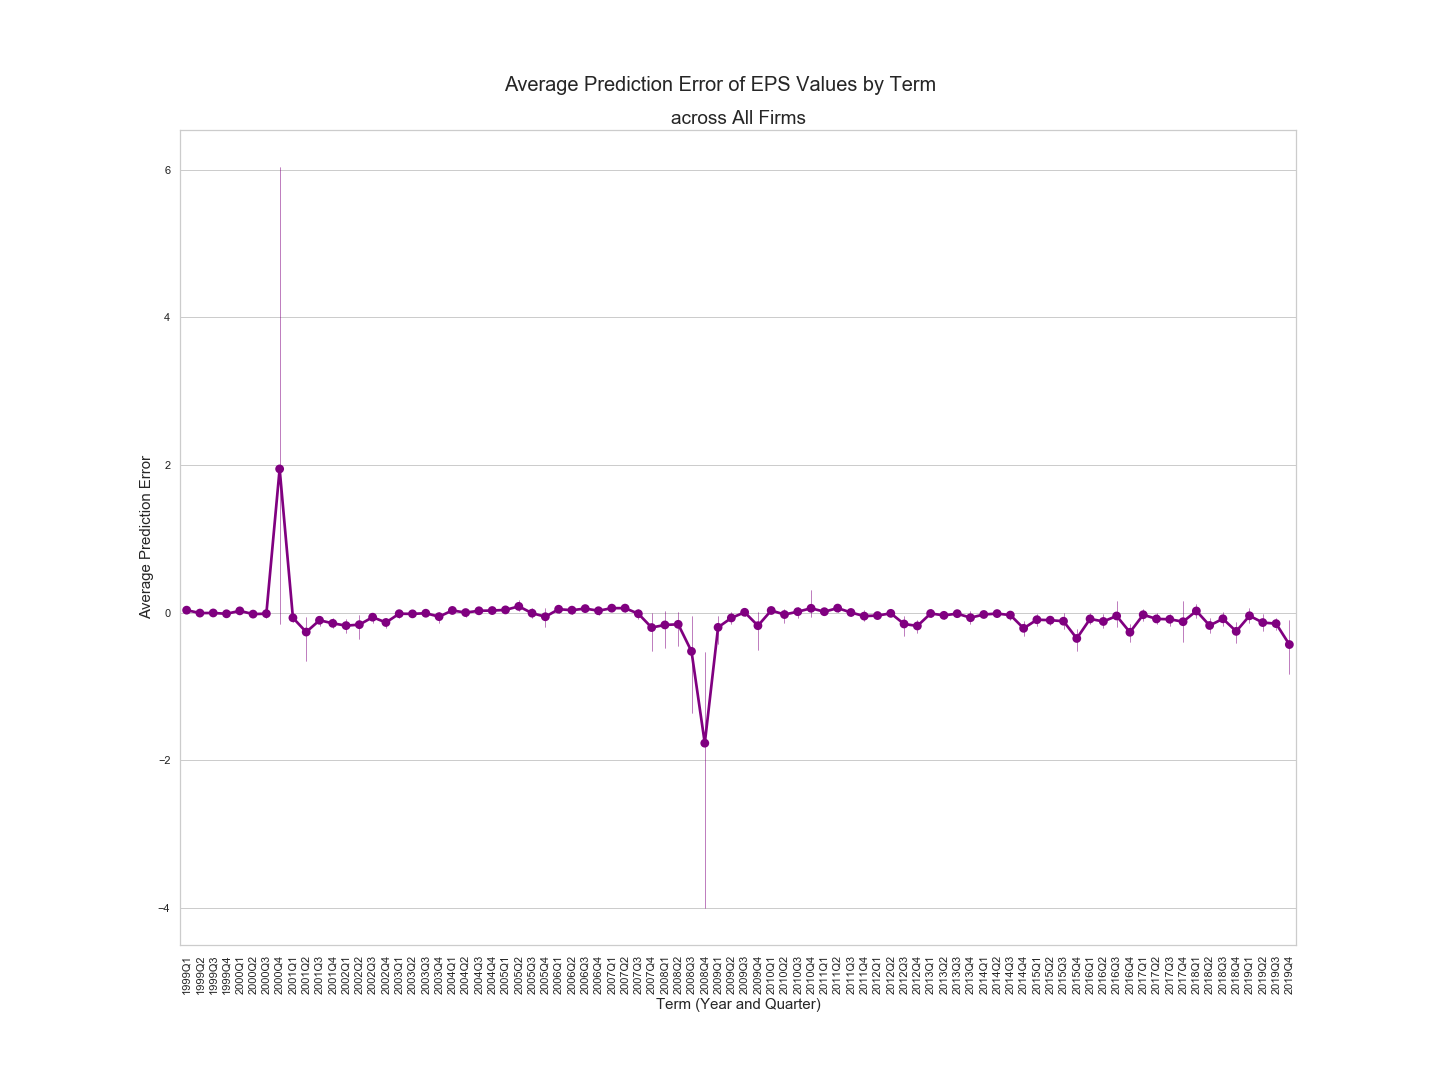

In [4]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-term.png')

**Observation 1:** Bloomberg forecasters were most **optimistic** in 2008Q4, and most **pessimistic** in 2000Q4.

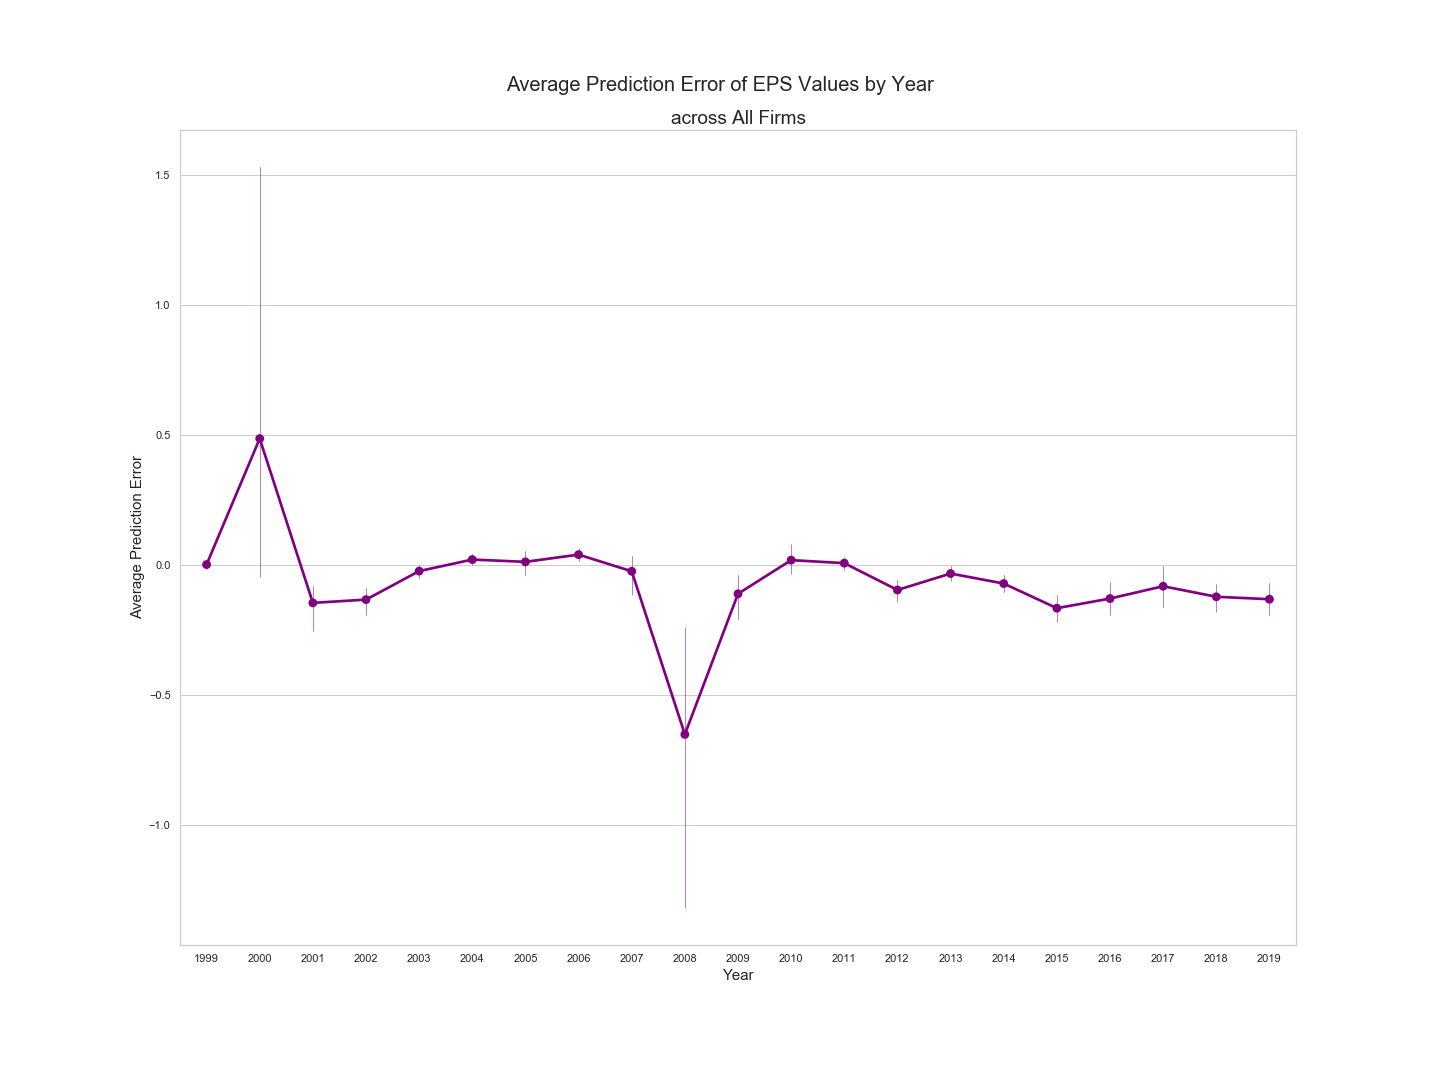

In [5]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-year.png')

**Observation 2:** Forecasters were most **optimistic** in 2008, and most **pessimistic** in 2000.
> This is consistent with the previous observation depicting EPS prediction error by full term, not by year.

**Observation 3:** When ignoring the optimistic and pessimistic outliers, there is no slope.
> All average EPS prediction errors gather around 0.

**Observation 3:** The year 2000 shows one of the widest variances in average prediction errors, ranging from 0 to 0.5.

**Observation 4:** The year 2008 shows one of the widest variances in average prediction errors, ranging from -0.25 to -1.5.

> This means that **outlier** Bloomberg EPS forecasts, on average, contain variety of data points that are far away from the mean. This means that the most "pessimistic" and "optimistic" forecasts contain a wider spread of data, and thus, are associated with forecasters making higher risks.

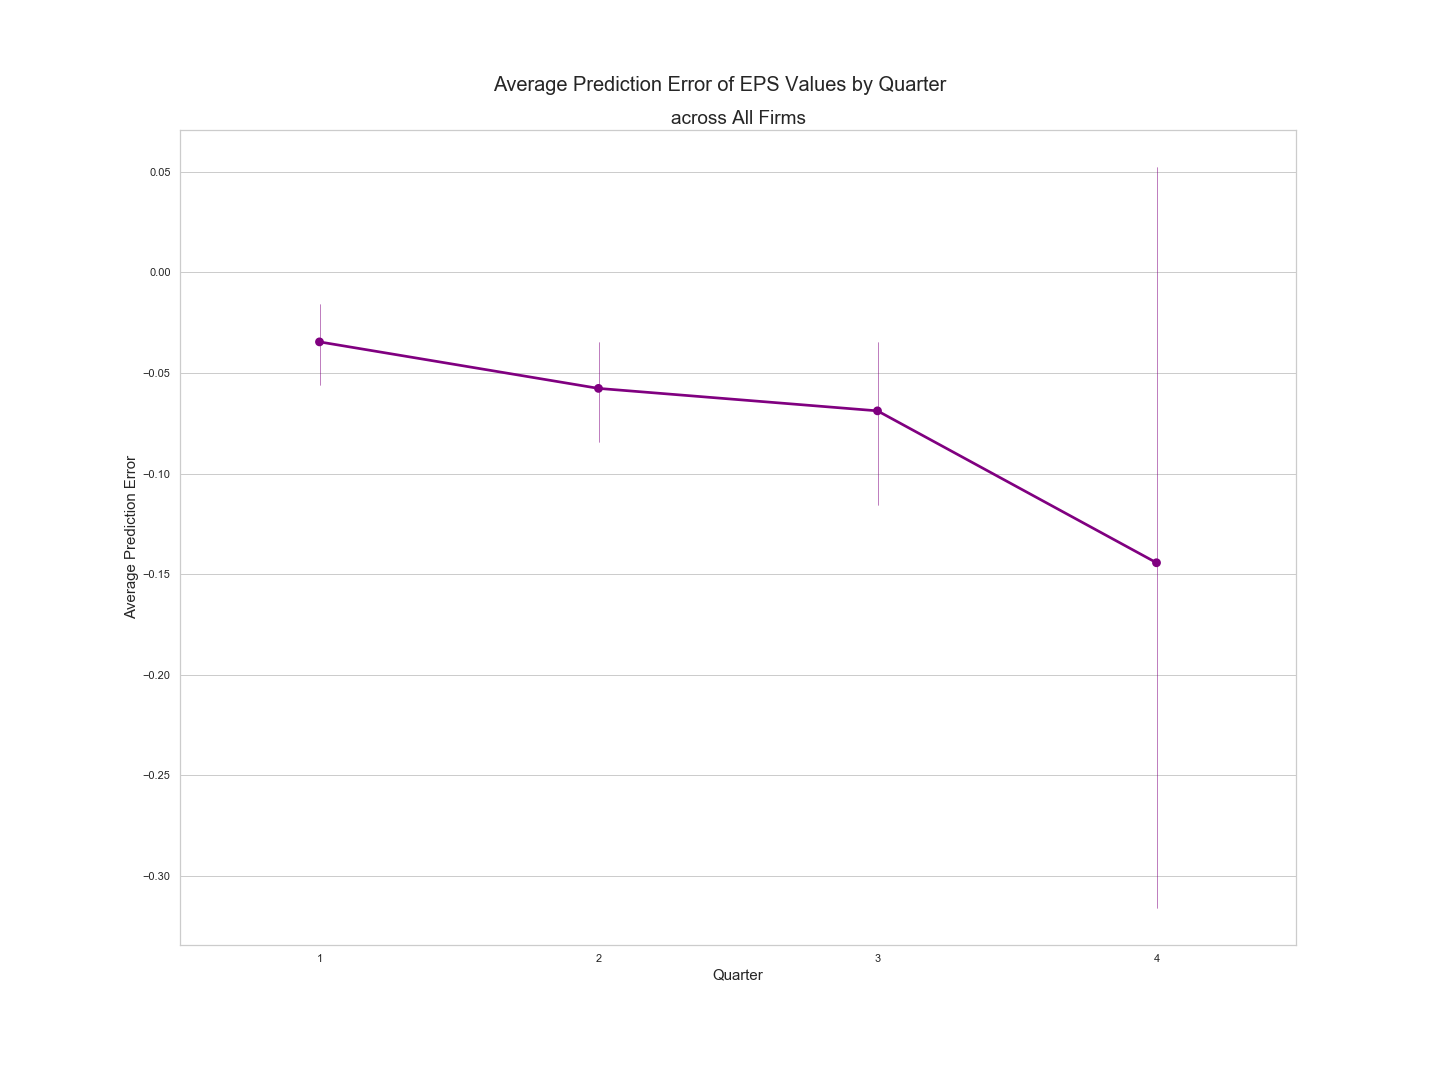

In [6]:
Image(filename = PATH_BIVARIATE + 'features-act-fc-diffs-quarter.png')

**Observation 5:** The later the quarter, the more optimistic forecasters become in their predictions. 
> Intuitively, this makes sense. As the familiarity of the year increases and stock market trends become more predictable, the more I conjecture that forecasters would become more confident in their EPS predictions.

**Observation 5a:** We only see a ***predictable pattern*** emerge when examining EPS prediction errors by a quarterly basis.
- pattern is *usually optimistic*
- outliers happen exclusively on Q4 of any given year.

## Question 2
> I generate "dumb EPS forecasts" by calculating the rolling mean of the 2 actual EPS values from the past 2 quarters. How do my EPS forecasts compare to Bloomberg's EPS forecasts?

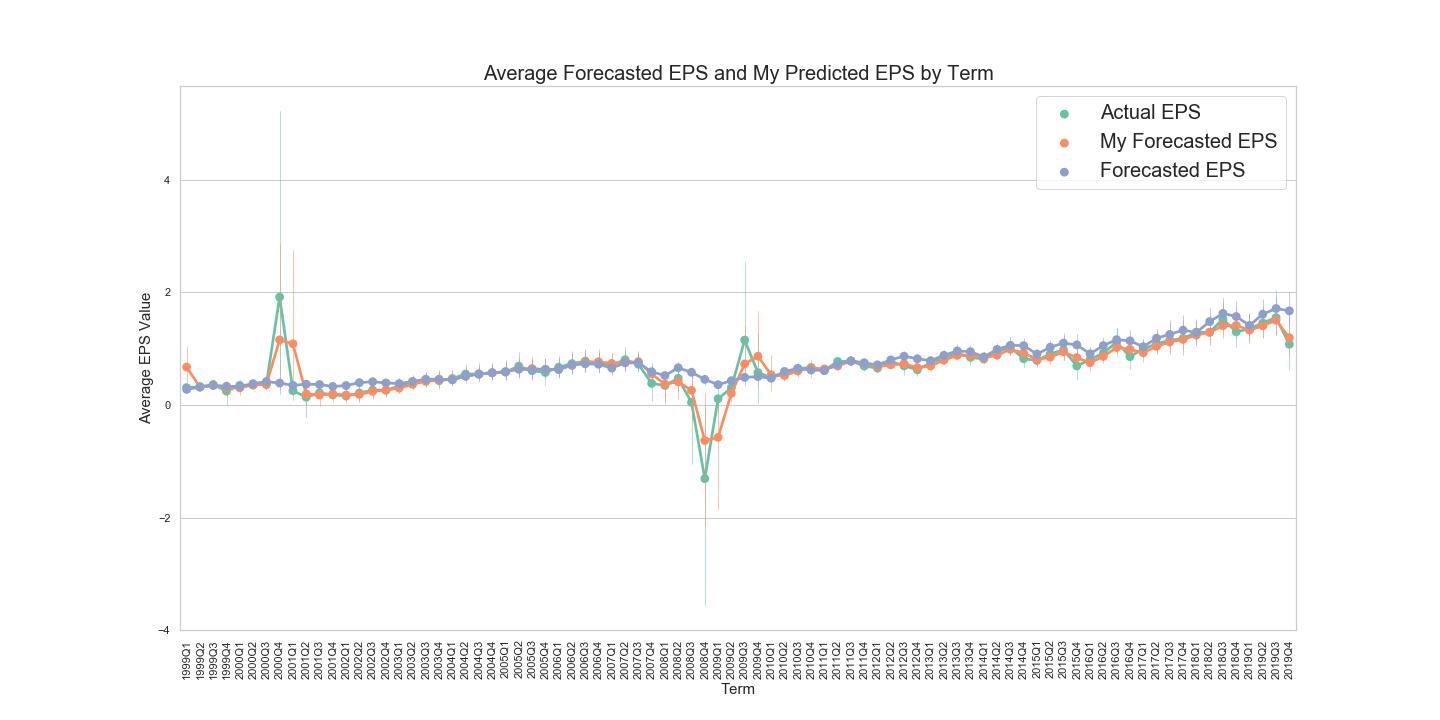

In [9]:
Image(filename = PATH_MULTIVARIATE + 'features-dumb-eps.png')

**Observation 1:** My average predicted EPS ***more closely follows the average actual EPS*** trend instead of the forecasters'.
> My method of using 2-quarter moving averages was much more effective in predicting average actual EPS than the method used by Bloomberg forecasters.

**Observation 2:** My predicted EPS is slightly less reliable; variance among my predictions is much higher, as shown through the above ***error bars*** by term.
- Though my prediction method more closely follows the actual EPS trend, my predicted values are much more "spread out" from the mean.
- All of my predictions contain higher variance than both the average of both actual EPS and Bloomberg EPS. This ***reduces  my prediction method's credibility*** when accounting for all individual data points.

**Observation 3:** My personal predictions "spiked" and "troughed" in 2000Q4 and 2008Q4--the exact same pattern depicted through the trends under Question 1.

**Observation 4:** Bloomberg' forecasted EPS displays *less* variance, and is only slightly more reliable than my method of using 2-quarter, or half-year, averages.

In [ ]:
#insert p-values and hypotheses

**Observation 5:** The p-value for the relationship between actual EPS and ***my forecasted EPS*** is 0.00. Similarly, the p-value for the relationship between actual EPS and ***Bloomberg forecasted EPS*** is 0.00.
- Both relationships are statistically significant.

> These p-values lead me to ***reject the null hypothesis*** in favor of the alternative that there is no difference between the means of actual EPS and both EPS forecast types.

**Observation 6:** Regardless of my forecast method containing high variance, the two p-values prove that the 2 relationships are not provable by chance alone.

## Question 3:

> What differences/similarities emerge when analyzing the prediction error and percentage error of EPS forecasts?

In [ ]:
#insert features-perror-term-firm

**Observation 1:** The top 5 most inaccurate firm tickers in terms of absolute ***prediction error*** are AGN, AIG, CHTR, LRCX, and VRSN.
> These stand for Allergan plc, American International Group Inc, Charter Communications Inc, Lam Research Corporation, and Verisign.

**Observation 1a:** The most notable outlier is **AIG.**
> This firm is, on average, the *only outlier* in Q3 of any given year.

In [ ]:
#insert pct-firm-term

**Observation 2:** The top 5 most inaccurate firm tickers in terms of absolute ***percnetage error*** are IBM, IRM, MCK, PXD, and QRVO.
> These stand for IBM Common Stock, Iron Mountain Inc., McKesson Corporation, Pioneer Natural Resources, and Qorvo Inc.

**Observation 2a:** The most notable outlier is **IRM.**
- Percentage error of over -1000 for EPS in the term 2014Q3.
- Outliers only start appearing in the year 2014 onward.

**Observation 3:** For *prediction errors*, Bloomberg forecasters, on average, are likely to be more inaccurate in Q4 of any given year.
> The top 5 most inaccurate firms by prediction error display relatively low average prediction errors until Q4, when both LRCX and AIG "branch off" into opposite directions.

In [ ]:
#insert stripplots

**Observation 4:** For *percentage errors*, EPS forecasts have ***become more inaccurate in the more recent terms***, starting from 2014Q3.
> This observation is consistent with the observations made in the quarterly and yearly stripplots above.

## Question 4:

> Does statistical significance stay true in the relationship between actual and forecasted EPS, regardless of forecasted EPS type (yearly, quarterly, twenty-year, and raw data)?

## Question 5

> How do EOD prices trend across all firms from 1999 - 2019?